# Simplified three plate column

In [2]:
import numpy
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import scipy.optimize
import scipy.integrate

In [3]:

α = 1.5

F = 10
xF = 0.25
D = 0.3*F
reflux = 0.9

Mc = 0.25
Mr = 0.25

init = [0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,3]
# M_star = 0.1 # nominal holdup 
# τ = 5
# Ltop = 0.3
# Lbot = 0.4

In [4]:
def model(t,var):
    xc,x1,x2,x3,xr,xt,M1,M2,M3,Mt = var
    
    y1 = x1*α/(1+(α-1)*x1)
    y2 = x2*α/(1+(α-1)*x2)
    y3 = x3*α/(1+(α-1)*x3)
    y4 = xr*α/(1+(α-1)*xr)

    L0 = reflux*D
    L1 = L0   # assuming flow in top section is constant
    L2 = L0 + F # assuming flow in bottom section is constant
    L3 = L0 + F
    
    V1 = F
    V2 = V1
    V3 = V1
    V4 = V1
    
    B = L3 - V4
    
    dxcdt = 1/Mc*(y1*V1 - xc*(L0 + D))

    dM1dt = V2 - V1 + L0 - L1
    
    dx1M1dt = y2*V2 - y1*V1 + xc*L0 - x1*L1
    dx1dt = 1/M1*(dx1M1dt - x1*dM1dt)

    dM2dt = V3 - V2 + L1 - L2 + F
    dx2M2dt = y3*V3 - y2*V2 + x1*L1 - x2*L2 + xF*F
    dx2dt = 1/M2*(dx2M2dt - x2*dM2dt)

    dM3dt = V4 - V3 + L2 - L3
    dx3M3dt = y4*V4 - y3*V3 + x2*L2 - x3*L3
    dx3dt = 1/M3*(dx3M3dt - x3*dM3dt)

    dxrdt = 1/Mr*(x3*L3 - y4*V4 - xr*B)
    
    dMtdt = F - (B+D)
    dMtxtdt = xF*F - (xr*B + xc*D)
    dxtdt = 1/Mt*(dMtxtdt - xt*dMtdt)
    

    return [dxcdt,dx2dt,dx2dt,dx3dt,dxrdt,dxtdt,dM1dt,dM2dt,dM3dt,dMtdt]


In [7]:
xci,x1i,x2i,x3i,xri,xti,M1i,M2i,M3i,Mti = scipy.integrate.solve_ivp(model,tspan,init).y
print(xci[-1],x1i[-1],x2i[-1],x3i[-1],xri[-1],xti[-1],M1i[-1],M2i[-1],M3i[-1],Mti[-1])


0.47622949807096193 0.19898086232021825 0.19898086232021825 0.15857505323288293 0.11962682585319853 0.17293738960667562 1.0 1.0 1.0 45.99999999999999


In [8]:
tspan = (0, 10)
t = numpy.linspace( *tspan, 100)
initial_run = scipy.integrate.solve_ivp(model, tspan, init, t_eval=t)

In [9]:
xc,x1,x2,x3,xr,xt,M1,M2,M3,Mt = initial_run.y
xc

array([0.1       , 0.34027734, 0.41212363, 0.43968576, 0.45427723,
       0.46289963, 0.46807417, 0.47123463, 0.47318313, 0.47435261,
       0.47510263, 0.47552846, 0.47578591, 0.4759779 , 0.47606393,
       0.4761434 , 0.47617515, 0.4761782 , 0.47622062, 0.47621747,
       0.4762258 , 0.47623434, 0.47621756, 0.47623975, 0.47623598,
       0.47622633, 0.47624047, 0.47622856, 0.47623727, 0.47624093,
       0.4762236 , 0.47623953, 0.47623696, 0.47623186, 0.47624205,
       0.47622563, 0.47623583, 0.47624343, 0.47622683, 0.47624006,
       0.47623053, 0.4762306 , 0.47624711, 0.47622442, 0.47624749,
       0.47623425, 0.47621407, 0.47624321, 0.47622945, 0.47623788,
       0.4762383 , 0.47621826, 0.47624268, 0.47623542, 0.47622953,
       0.4762405 , 0.47622622, 0.4762392 , 0.47623999, 0.47622429,
       0.47624005, 0.47623487, 0.47623389, 0.47624184, 0.47622475,
       0.47623702, 0.47624212, 0.47622845, 0.4762406 , 0.47622901,
       0.47623213, 0.4762467 , 0.47622538, 0.47623656, 0.47623

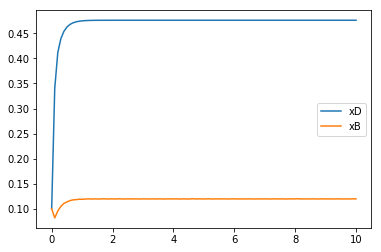

In [10]:
plt.plot(t,xc,label = "xD")
plt.plot(t,xr,label = "xB")
plt.legend()

0.7055008588543595

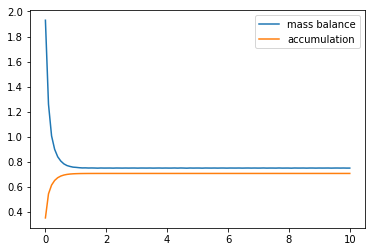

In [11]:
L0 = reflux*D
L1 = L0   # assuming flow in top section is constant
L2 = L0 + F # assuming flow in bottom section is constant
L3 = L0 + F

V1 = F
V2 = V1
V3 = V1
V4 = V1

accum = xF*F - xr*(L3-V4) - xc*D 
accum1 = (xc*Mc+x1*M1+x2*M2+x3*M3+xr*Mr)
plt.plot(t,accum,label = "mass balance")
plt.plot(t,accum1,label = "accumulation")
plt.legend()
accum1[-1]


In [20]:
L0 = reflux*D
L1 = L0  # assuming flow in top section is constant
L2 = L0 + F # assuming flow in bottom section is constant
L3 = L0 + F

V1 = F
V2 = V1
V3 = V1
V4 = V1
B = L3 - V4

dMtxtdt = xF*F - (xr*B + xc*D)
numpy.trapz(dMtxtdt,t)-0.1*15

6.161092096320438

In [21]:
integral = []
for i in range(1,len(t)+1):
    dMtxtdt = xF*F - (xr[0:i]*B + xc[0:i]*D)
    integral.append(numpy.trapz(dMtxtdt,t[0:i])-0.1*3)

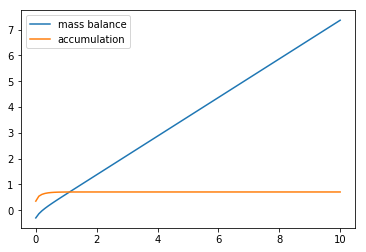

In [22]:
accum = xF*F - xr*(reflux*D + D) - xc*D 
# accum1 = (xc*Mc+x1*M1+x2*M2+x3*M3+xr*Mr)
plt.plot(t,integral,label = "mass balance")
plt.plot(t,accum1,label = "accumulation")
plt.legend()
